<a href="https://colab.research.google.com/github/luciabarg/mentoria_img/blob/master/3_An%C3%A1lisis_y_Curaci%C3%B3n_Detecci%C3%B3n_de_Objetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación </h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
<h2>Mentoría: Detección de objetos en imágenes</h2>
</center>


Para la generación de la tabla utilizada en esta notebook, incorporamos parte de lo realizado en las entregas 1 de los grupos de estudiantes: 

* [Grupo 1](https://github.com/) : Ana Rusconi, Ignacio Grosso y  Mariano Lucero

* [Grupo 2](https://github.com/leorodriguez/mentoria-diplodatos-grupo2):  Diego Gonzalez, Florencia Caballero, Joel Vivas y Leonardo Rodriguez


<a name="exploratoracion_y_curacion"></a>
#### **2 - Exploración y Curación**



Como en la entrega anterior tuvieron la oportunidad de explorar una sola carpeta del dataset, en esta entrega vamos a utilizar una pequeña muestra de las imágenes para que el análisis sea mas representativo del conjunto de datos total. 

En la siguiente sección <a href="#hay_tabla!"> Análisis Exploratorio</a> vamos a analizar la tabla generada (con algunas modificaciones) en la notebook '[2-Generación_de_fotos_recortadas_y_tabla-Análisis_y_Curación](https://colab.research.google.com/drive/1fgB4F4DlBqkCvOatqo3whm4ZTPsiP0L7?usp=sharing)'


La carpeta con los datos, es compartida en el [Drive](https://drive.google.com/drive/folders/1_2oDQPL7n8QI_YEUOecAHyabwA9Gmud0?usp=sharing) y en el desarrollo de esta entrega con las consignas, se utilizará la misma en el entorno de Colab, pero también pueden descargarla desde el repositorio de Github de la mentoría en la carpeta ['muestra'](https://github.com/luciabarg/mentoria_img) 


Usando como entorno a Colab:

In [6]:
#vinculamos el Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# librerías necesarias 
import os
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob

#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import cv2
import numpy as np

import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path

from google.colab.patches import cv2_imshow #en Colab!

import seaborn as sns

import re

import json

#### <a name="hay_tabla!"></a>
#### **Análisis exploratorio**

In [33]:
#nos posicionamos en la carpeta muestra:
os.chdir('/content/drive/My Drive/Mentoria/muestra')
! ls -d Dataset-*/

Dataset-M/  Dataset-N/	Dataset-T/


In [9]:
#leemos el archivo de la tabla:
csv_wlabels_df = pd.read_csv('csv_wlabels_muestra_modificado_df.csv', index_col=0)
print(csv_wlabels_df.shape)
csv_wlabels_df.head()

(1668, 2061)


,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218.0,461.0,464.0,715.0,M,G,train,243.0,251.0,60993.0,si,Amarillo,0.740974,1.066019,0.132695,0.224892,0.140456,0.129134,0.201447,1.076733,0.461108,0.299800,0.457940,0.201904,0.569677,0.737381,0.480929,0.200076,0.018410,0.674050,0.028826,0.005310,0.128693,0.592353,0.138541,0.141684,0.363294,0.264674,0.519292,...,0.463567,0.091676,0.300955,0.696112,2.409413,0.536980,0.102273,0.157441,0.165093,1.067619,0.751934,0.231443,0.487437,0.446320,0.822407,0.527523,0.217110,0.489194,1.535306,0.521390,0.599480,0.201182,0.391337,0.040206,1.347440,0.448389,0.462778,0.590751,0.877142,0.009986,0.939221,0.859877,0.981910,0.356366,1.748501,0.288037,0.079172,0.266234,0.078312,0.421612
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617.0,865.0,432.0,598.0,M,G,train,248.0,166.0,41168.0,si,Amarillo,1.621832,0.208859,0.627041,0.061717,0.052486,0.064176,0.479256,1.068516,0.509059,0.207385,0.218195,0.169190,0.695486,0.237641,0.146711,0.126334,0.029900,0.148363,0.126833,0.181351,0.044585,0.447270,0.134360,0.113650,1.153900,0.653832,0.041024,...,0.816892,0.027489,0.183116,0.626535,1.734605,0.672962,0.030057,0.101685,0.295544,0.392251,0.874054,0.105285,0.110713,0.421417,1.335695,0.500971,1.139208,0.110803,0.850265,0.618181,0.077352,0.376629,0.319234,0.783792,0.427963,0.133063,0.064981,0.017857,0.320706,0.219192,1.199712,0.808466,0.491182,0.356616,0.812572,0.481357,0.071471,0.572322,0.052072,0.213453
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875.0,1169.0,321.0,450.0,M,G,train,294.0,129.0,37926.0,si,Amarillo,0.777015,0.350298,0.523675,0.141681,0.008227,0.364888,0.559975,1.060057,0.648008,0.075809,0.419526,0.200864,0.553840,0.182195,0.244877,0.038389,0.046786,0.020999,0.281995,0.016088,0.135179,0.635030,0.276898,0.014077,0.613297,0.622520,0.117482,...,0.250315,0.025067,0.150927,0.604435,1.067641,0.847809,0.220889,0.298962,0.535717,0.566534,0.531686,0.208911,0.254966,0.229268,1.809620,0.362365,0.468568,0.055350,1.388036,0.884211,0.340101,0.305252,0.343156,1.061346,1.043128,0.004126,0.033861,0.020319,0.621639,0.040598,0.916142,0.246840,0.688755,0.101427,0.917090,0.407893,0.343683,0.428996,0.080831,0.005678
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502.0,758.0,145.0,307.0,M,G,train,256.0,162.0,41472.0,no,Amarillo,0.206803,0.032262,0.783582,0.104788,0.198923,0.229943,0.102975,1.872409,0.646370,0.369061,0.323460,0.136720,0.515654,0.139382,0.084579,0.205710,0.007865,0.329643,0.279838,0.096330,0.003207,0.161915,0.546153,0.034820,0.178539,0.245108,0.190008,...,0.146642,0.114052,0.005513,0.370992,0.665213,1.402337,0.162487,0.155748,0.241372,0.702011,0.993891,0.174953,0.551115,0.294757,0.660277,0.545881,0.343379,0.348534,0.342936,0.632171,0.079185,0.238604,0.062875,0.798502,1.009929,0.130553,0.003187,0.115578,0.427998,0.110039,0.992854,0.904692,0.112806,0.488674,1.150740,0.275088,0.254404,0.455159,0.012721,0.091329
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916.0,1151.0,285.0,463.0,M,G,train,235.0,178.0,41830.0,no,Amarillo,0.683246,0.319097,0.322898,0.489538,0.152056,0.593756,0.177822,1.093265,0.949665,0.154196,0.645907,0.270926,0.383814,0.204949,0.398145,0.102344,0.060811,0.121956,0.028302,0.120451,0.244606,0.387735,0.251303,0.236359,0.880333,0.466272,0.185311,...,0.652505,0.140662,0.354066,0.571745,2.067905,1.038591,0.099552,0.280820,0.516782,0.820352,0.601326,0.042655,0.119472,0.094523,2.042640,0.790532,0.266744,0.056142,0.620942,0.859705,0.439731,0.290626,0.310608,0.721135,0.988298,0.026431,0.317181,0.199194,0.524838,0.139992,1.304742,0.415517,0.652986,0.141079,1.024287,0.117491,0.007151,0.294575,0.217550,0.240535


* Chequeen los tipos de datos. Se corresponden a lo esperado? Pueden fijarse en el siguiente [link](https://dimewiki.worldbank.org/wiki/Data_Cleaning).
* Recuerden de trabajar sobre una copia de la tabla así siempre pueden volver a comenzar si así fuera necesario.
* Tomar porciones aleatorias del dataframe para ver si van descubriendo inconsistencias y vayan notándolas.
* Busquen si existen valores nulos. Los eliminarían? Si no los eliminan, que estrategia utilizarían para imputarlos? Esto serviría para cualquier clase de datos? 
* Propongan como solucionar las inconsistencias y vayan llevándolas a cabo de manera clara. 

Debería quedarles una tabla igual a la generada en la notebook '[2-Generación_de_fotos_recortadas_y_tabla-Análisis_y_Curación](https://colab.research.google.com/drive/1fgB4F4DlBqkCvOatqo3whm4ZTPsiP0L7?usp=sharing)': *'csv_wlabels_muestra_df_original.csv'*

###### *Análisis*
* Para realizar el análisis, separen entre los tamaños 'P' y 'G'.

* Determinen las dimensiones máximas y mínimas de pixeles para los conjuntos train y test (de 'P' y 'G' respectivamente)

* Recuerden que las columnas 0 a 2048 se corresponden al *'feature vector'* de la imagen. Es decir, es una representación *'densa'* de la misma.

   ¿Toman valores mayores a 1 o negativos? ¿Eso qué implica? 

* Realizen nuevamente una exploración de los features, distinguir entre momentos del día 'M', 'T' y 'N'. 

* Chequeen lo que realizó el otro grupo para ver si puede sumar al análisis que ya realizaron en la entrega 1 de 'Análisis y Visualización'.



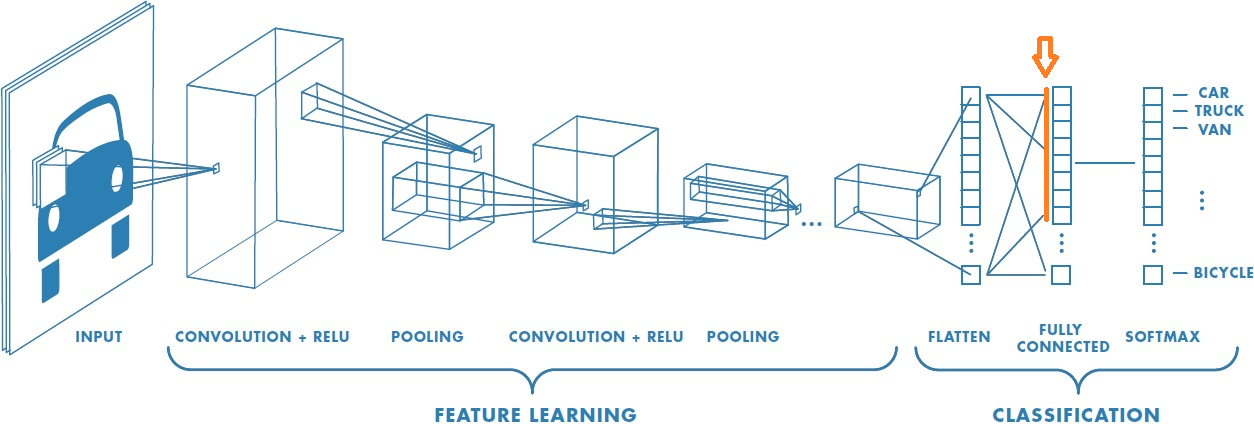

In [34]:
Imge('layer_resnet.png')
# https://becominghuman.ai/extract-a-feature-vector-for-any-image-with-pytorch-9717561d1d4c
# Feature extraction is a type of dimensionality reduction where a large number of pixels of the image are efficiently represented in such a way that interesting parts of the image are captured effectively.